# Import All necessary modules

In [1]:
import pandas as pd
import sys
import os


sys.path.append(os.path.abspath(os.path.join('../scripts')))

from clean_tellco_dataframe import Tellco
from plot_dataframe import Plotter

tellco_df = pd.read_csv("../data/clean_data.csv")
plot = Plotter()
cleaner = Tellco()

In [2]:
tellco_df.columns.to_list()

['Unnamed: 0',
 'Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur (ms)',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Byt

# HandSet Analysis

In [3]:
# get the top 10 handset types
tellco_df['Handset Type'].value_counts().head(10)

Huawei B528S-23A                19373
Apple iPhone 6S (A1688)          9369
Apple iPhone 6 (A1586)           8967
Apple iPhone 7 (A1778)           6240
Apple iPhone Se (A1723)          5151
Apple iPhone 8 (A1905)           4961
Apple iPhone Xr (A2105)          4542
Samsung Galaxy S8 (Sm-G950F)     4404
Apple iPhone X (A1901)           3788
Samsung Galaxy A5 Sm-A520F       3673
Name: Handset Type, dtype: int64

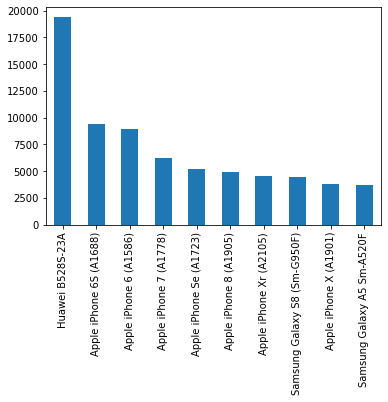

In [4]:
# plot the top handset type
tellco_df['Handset Type'].value_counts().head(10).plot(kind='bar')

In [5]:
# Count Handset Manufacturers
tellco_df[['Handset Manufacturer']].value_counts()

Handset Manufacturer                            
Apple                                               59072
Samsung                                             39902
Huawei                                              33755
Sony Mobile Communications Ab                         925
Wiko Global Sasu                                      724
                                                    ...  
Shenzhen Sprocomm Technologies Co Ltd                   1
Shenzhen Yiqingteng Electronic Technology Co Ltd        1
Sintave Technology (Group) Co Ltd                       1
Sonim Technologies Inc                                  1
Shenzhen Diadem Technology Co Ltd                       1
Length: 167, dtype: int64

In [6]:
# select Top 3 MAnufacturers
top_handset_manufacturers = tellco_df['Handset Manufacturer'].value_counts().head(3)
top_handset_manufacturers

Apple      59072
Samsung    39902
Huawei     33755
Name: Handset Manufacturer, dtype: int64

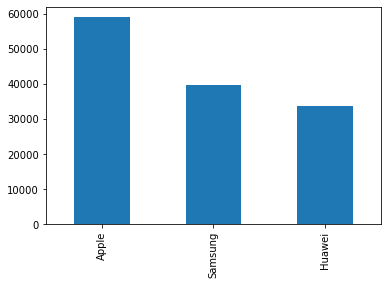

In [7]:
# Plot the top manufacturers
top_handset_manufacturers.plot(kind='bar')

In [8]:
# Get top handsets of top handset manufacturers
top_handset_manufacturers = tellco_df[tellco_df["Handset Manufacturer"].isin(top_handset_manufacturers.index.tolist())]
top_handsets = top_handset_manufacturers['Handset Type'].groupby(tellco_df['Handset Manufacturer']).apply(lambda x: x.value_counts().head(5))
top_handsets

Handset Manufacturer                                
Apple                 Apple iPhone 6S (A1688)            9369
                      Apple iPhone 6 (A1586)             8967
                      Apple iPhone 7 (A1778)             6240
                      Apple iPhone Se (A1723)            5151
                      Apple iPhone 8 (A1905)             4961
Huawei                Huawei B528S-23A                  19373
                      Huawei E5180                       2062
                      Huawei P20 Lite Huawei Nova 3E     2000
                      Huawei P20                         1471
                      Huawei Y6 2018                      984
Samsung               Samsung Galaxy S8 (Sm-G950F)       4404
                      Samsung Galaxy A5 Sm-A520F         3673
                      Samsung Galaxy J5 (Sm-J530)        3664
                      Samsung Galaxy J3 (Sm-J330)        3431
                      Samsung Galaxy S7 (Sm-G930X)       3106
Name: Handset Typ

# xDR Session Analysis

In [9]:
# group by MSISDN/ Number and get the number of xDR sessions with sorting from high to low
number_of_xdr = tellco_df.groupby('MSISDN/Number')['MSISDN/Number'].agg('count').reset_index(name='Bearer Id').sort_values(by='Bearer Id',
        ascending=False)

number_of_xdr.rename(columns={number_of_xdr.columns[1]: 'number of xDR sessions'}, inplace=True)
number_of_xdr

,MSISDN/Number,number of xDR sessions
12555,33626320676,18
12236,33625779332,17
5959,33614892860,17
34383,33659725664,16
70947,33675877202,15
...,...,...
38055,33660654764,1
38054,33660654733,1
38053,33660654706,1
38052,33660654577,1


In [10]:
# Calcualte the total Duration of Sessions per MSISDN/ Number with sorting from high to low 
sum_duration_of_sessions = tellco_df.groupby('MSISDN/Number').agg({'Dur (ms)': 'sum'}).sort_values(by='Dur (ms)',ascending=False)

sum_duration_of_sessions.rename(columns={sum_duration_of_sessions.columns[0]: 'duration of xDR sessions (total)'}, inplace=True)
sum_duration_of_sessions['duration of xDR sessions (total)'] = sum_duration_of_sessions['duration of xDR sessions (total)'].astype("int64")
sum_duration_of_sessions

,duration of xDR sessions (total)
MSISDN/Number,
33625779332,4054512867
33626320676,3933949278
33614892860,3826925804
33659725664,3440143637
33760536639,3339214683
...,...
33650431620,7267018
33698390293,7258080
33659328207,7189000


In [11]:
# Calcualte the Avarage Duration of Sessions per MSISDN/ Number with sorting from high to low 
avg_duration_of_sessions = tellco_df.groupby('MSISDN/Number').agg({'Dur (ms)': 'mean'}).sort_values(by='Dur (ms)',ascending=False)

avg_duration_of_sessions.rename(columns={avg_duration_of_sessions.columns[0]: 'duration of xDR sessions (AVG)'}, inplace=True)
avg_duration_of_sessions

,duration of xDR sessions (AVG)
MSISDN/Number,
337000037000919,239865286.0
33669799328,239865286.0
33662639020,239865286.0
33769448226,239865286.0
33632954090,239865286.0
...,...
33650431620,7267018.0
33698390293,7258080.0
33659328207,7189000.0


# Total Data Volume Analysis

In [12]:
# Get the number of total Data Volume of each MSISDN / Number with sorting from high to low
data_volumes = tellco_df.groupby('MSISDN/Number')[['Total UL (Bytes)', 'Total DL (Bytes)', 'Total Data Volume (Bytes)']].sum().sort_values(by='Total Data Volume (Bytes)',ascending=False)
data_volumes['Total Data Volume (Bytes)'] = data_volumes['Total Data Volume (Bytes)'].astype("int64")
data_volumes['Total DL (Bytes)'] = data_volumes['Total DL (Bytes)'].astype("int64")
data_volumes['Total UL (Bytes)'] = data_volumes['Total UL (Bytes)'].astype("int64")
data_volumes

,Total UL (Bytes),Total DL (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,
33614892860,689483001,8156743493,8846226494
33760536639,703478581,7811295382,8514773963
33625779332,729577380,7770043342,8499620722
33626320676,669650721,7301516540,7971167261
33675877202,581568792,7309541816,7891110608
...,...,...,...
33675475328,23503704,14518653,38022357
33782507973,26623910,11305331,37929241
33666684512,24544016,9455608,33999624


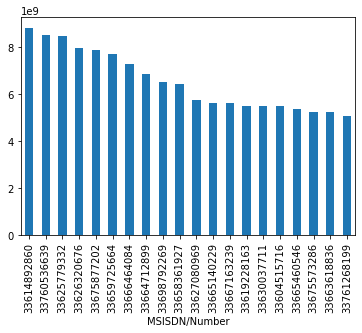

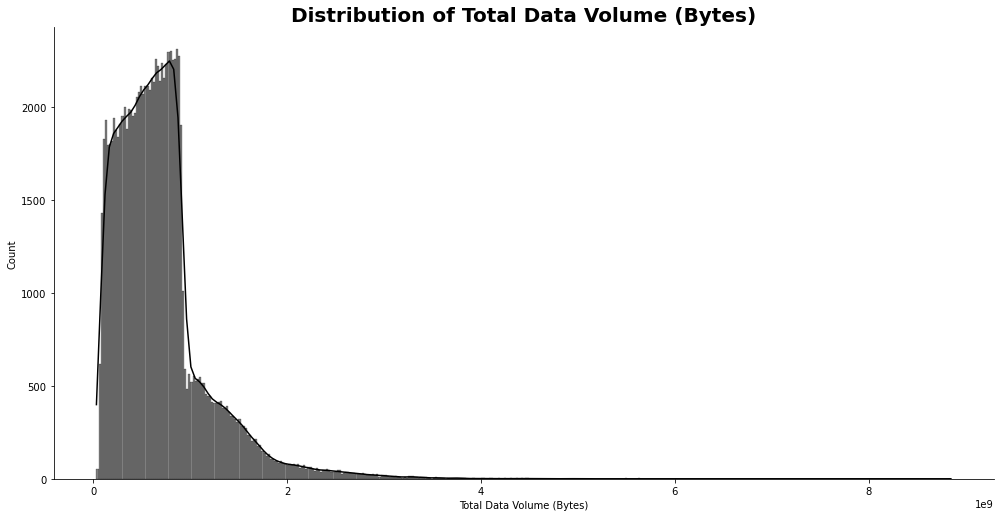

In [13]:
# plot top 20  MSISDN / Number with highest Total Data Volume
# plot the distribution of Total data Volume Per Each MSISDN / Number
data_volumes['Total Data Volume (Bytes)'].head(20).plot(kind="bar")
plot.plot_hist(data_volumes, 'Total Data Volume (Bytes)', 'black')

In [14]:
# Get the number of Each Application Data Volume of each MSISDN / Number with sorting by Total Data Volume from high to low
data_volume_per_app = tellco_df.groupby('MSISDN/Number')[['Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)','Email Data Volume (Bytes)', 'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)','Gaming Data Volume (Bytes)', 'Other Data Volume (Bytes)', 'Total Data Volume (Bytes)']].sum().sort_values(by='Total Data Volume (Bytes)',ascending=False)
data_volume_per_app.head(5)

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,,,,,,
33614892860,28294544.0,127973787.0,40788634.0,394370218.0,361401046.0,7.749432e+09,7.639264e+09,8.846226e+09
33760536639,39783189.0,123223099.0,33693767.0,396289198.0,334643269.0,7.461045e+09,4.716134e+09,8.514774e+09
33625779332,27135500.0,142307915.0,40633966.0,452958769.0,356980607.0,7.326673e+09,6.354583e+09,8.499621e+09
33626320676,43374779.0,152191852.0,42418782.0,374483047.0,328725740.0,6.887572e+09,8.167878e+09,7.971167e+09
33675877202,19222921.0,109860502.0,31514421.0,317410572.0,309093159.0,6.970568e+09,6.798515e+09,7.891111e+09


# Draw Bivariate Graph with Applications Volume Data and Total Volume Data For Interm Report  

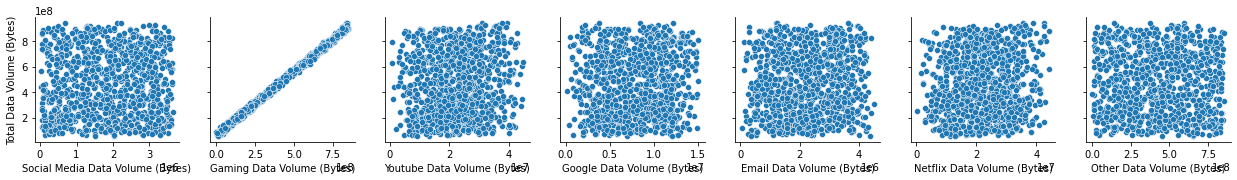

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
# g = sns.PairGrid(tellco_df, y_vars=["Total Data Volume (Bytes)"], x_vars=['Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)', 'Email Data Volume (Bytes)','Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)', 'Gaming Data Volume (Bytes)','Other Data Volume (Bytes)'], height=4)
# g.map(sns.regplot, color=".3")
# g.set(ylim=(-1, 11), yticks=[0, 5, 10])
sns.pairplot(
    tellco_df.head(1000),
    x_vars=['Social Media Data Volume (Bytes)', 'Gaming Data Volume (Bytes)', "Youtube Data Volume (Bytes)",'Google Data Volume (Bytes)','Email Data Volume (Bytes)','Netflix Data Volume (Bytes)','Other Data Volume (Bytes)'],
    y_vars=["Total Data Volume (Bytes)"],
)
# plt.plot(tellco_df['Social Media Data Volume (Bytes)'], tellco_df['Total Data Volume (Bytes)'], 'bar', label='label here')
# plt.plot(tellco_df['Social Media Data Volume (Bytes)'], tellco_df['Total Data Volume (Bytes)'], 'bar', label='label here')
# plt.legend(loc='best')
# plt.show()
# fig, axes = plt.subplots(3, 3, figsize=(12, 7))

# fig.suptitle(' Stats by Generation')
# ax = plt.subplot(2,2,1)
# sns.scatterplot(ax=ax, data=tellco_df, x='Social Media Data Volume (Bytes)', y='Total Data Volume (Bytes)')
# ax = plt.subplot(2,2,2)
# sns.scatterplot(ax=ax, data=tellco_df, x='Google Data Volume (Bytes)', y='Total Data Volume (Bytes)')
# ax = plt.subplot(2,2,3)
# sns.scatterplot(ax=ax, data=tellco_df, x='Email Data Volume (Bytes)', y='Total Data Volume (Bytes)')
# ax = plt.subplot(3,2,1)
# sns.scatterplot(ax=ax, data=tellco_df, x='Youtube Data Volume (Bytes)', y='Total Data Volume (Bytes)')
# ax = plt.subplot(3,2,2)
# sns.scatterplot(ax=ax, data=tellco_df, x='Netflix Data Volume (Bytes)', y='Total Data Volume (Bytes)')
# ax = plt.subplot(3,2,3)
# sns.scatterplot(ax=ax, data=tellco_df, y='Gaming Data Volume (Bytes)', x='Total Data Volume (Bytes)')
# ax = plt.subplot(3,2,4)
# sns.scatterplot(ax=ax, data=tellco_df, y='Other Data Volume (Bytes)', x='Total Data Volume (Bytes)')
# sns.scatterplot(ax=axes[1, 2], data=tellco_df, x='Other Data Volume (Bytes)', y='Total Data Volume (Bytes)')

In [19]:
import numpy as np
df_float = tellco_df.select_dtypes(include=[float])
df_int = tellco_df.select_dtypes(include=[int])
df = tellco_df
number_array = df_float.columns.to_list() + df_int.columns.to_list()
number_array
from sklearn.preprocessing import StandardScaler
features = number_array
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
# y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

['Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur (ms)',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (Bytes)',
 'Social Media Data Volume (Bytes)',
 'Google Data Volume (Bytes)',
 'Email Data Volume (Bytes)',
 'You

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = number_array)